![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Color Segmentation using K-Means

[Reference](https://www.thepythoncode.com/article/kmeans-for-image-segmentation-opencv-python)

In [ ]:
!wget https://www.dropbox.com/s/mo8cniz56e58lyy/river.png
!wget https://www.dropbox.com/s/abpp000mffxgvqe/flowers.jpg

--2023-11-16 14:58:49--  https://www.dropbox.com/s/mo8cniz56e58lyy/river.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/mo8cniz56e58lyy/river.png [following]
--2023-11-16 14:58:49--  https://www.dropbox.com/s/raw/mo8cniz56e58lyy/river.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9559b71d86def136b7d868ff06.dl.dropboxusercontent.com/cd/0/inline/CHpwraqfxo0vxoibfxAXeWhBwA3EELSVO3K-aDWupk-3tKVrfioLZKgOGDq2qT-rUyoCHNDs8km0a7Stk4UWV3B_TlJexN5tNR5XZEboJaxysYCqabjUY_mzcEDD2xpW9QE/file# [following]
--2023-11-16 14:58:49--  https://uc9559b71d86def136b7d868ff06.dl.dropboxusercontent.com/cd/0/inline/CHpwraqfxo0vxoibfxAXeWhBwA3EELSVO3K-aDWupk-3tKVrfioLZKgOGDq2qT-rUyoCHNDs8km0a7Stk4UWV3B_TlJexN5tNR5XZEboJaxysYCqabjUY_mzcEDD2xpW9Q

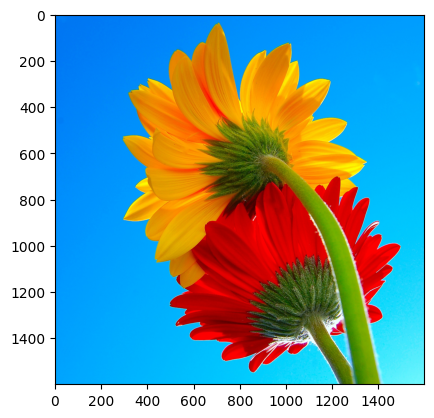

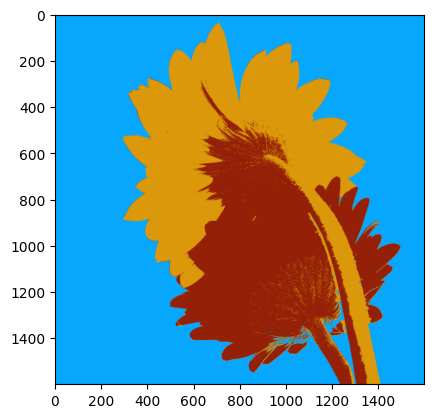

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

# read the image
#image = cv2.imread('river.png')
#k = 3 # numbers of clusters (K)
image = cv2.imread('flowers.jpg')
k = 3 # numbers of clusters (K)

# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

compactness, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)

# show the image
plt.imshow(segmented_image)
plt.show()



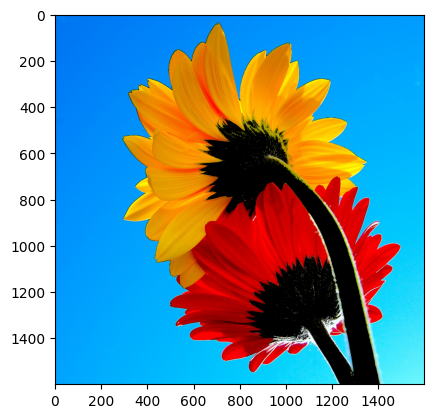

In [ ]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 0
masked_image[labels == cluster] = [0, 0, 0]

# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
plt.show()